<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(_1_6)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-1.6'

In [5]:
os.listdir(base_path)

['data_add_delta_-1.6_n250.csv',
 'data_add_delta_-1.6_n120.csv',
 'data_add_delta_-1.6_n60.csv',
 'data_add_delta_-1.6_n30.csv',
 'data_add_delta_-1.6_n20.csv']

In [6]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.6_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,69.443892,52.696260,0.003624,132.143776,132.133402,0.010374
1,0.0,1.0,35.557278,74.665554,-0.050183,120.172648,120.216822,-0.044174
2,0.0,2.0,72.956284,72.514314,-0.009825,155.460773,155.462427,-0.001654
3,0.0,3.0,91.245289,73.959724,-0.004521,175.200492,175.195633,0.004859
4,0.0,4.0,72.451047,61.577364,-0.024932,144.003479,144.020936,-0.017457
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,73.952583,79.915626,-0.000849,163.867360,163.863613,0.003747
59996,999.0,56.0,79.110852,92.777875,0.010162,181.898889,181.882930,0.015958
59997,999.0,57.0,42.031398,70.087202,0.090005,122.208605,122.126385,0.082220
59998,999.0,58.0,45.663199,70.951460,0.027651,126.642310,126.621017,0.021292


In [7]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,69.443892,52.696260,0.003624,132.143776,132.133402,0.010374
1,0.0,1.0,35.557278,74.665554,-0.050183,120.172648,120.216822,-0.044174
2,0.0,2.0,72.956284,72.514314,-0.009825,155.460773,155.462427,-0.001654
3,0.0,3.0,91.245289,73.959724,-0.004521,175.200492,175.195633,0.004859
4,0.0,4.0,72.451047,61.577364,-0.024932,144.003479,144.020936,-0.017457
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,73.952583,79.915626,-0.000849,163.867360,163.863613,0.003747
59996,999.0,56.0,79.110852,92.777875,0.010162,181.898889,181.882930,0.015958
59997,999.0,57.0,42.031398,70.087202,0.090005,122.208605,122.126385,0.082220
59998,999.0,58.0,45.663199,70.951460,0.027651,126.642310,126.621017,0.021292


In [8]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    69.443892  52.696260  0.003624  132.143776  132.133402  0.010374
      1.0    35.557278  74.665554 -0.050183  120.172648  120.216822 -0.044174
      2.0    72.956284  72.514314 -0.009825  155.460773  155.462427 -0.001654
      3.0    91.245289  73.959724 -0.004521  175.200492  175.195633  0.004859
      4.0    72.451047  61.577364 -0.024932  144.003479  144.020936 -0.017457
...                ...        ...       ...         ...         ...       ...
999.0 55.0   73.952583  79.915626 -0.000849  163.867360  163.863613  0.003747
      56.0   79.110852  92.777875  0.010162  181.898889  181.882930  0.015958
      57.0   42.031398  70.087202  0.090005  122.208605  122.126385  0.082220
      58.0   45.663199  70.951460  0.027651  126.642310  126.621017  0.021292
      59.0   97.112161  47.191964 -0.018447  154.285678  154.287719 -0.002040

[60000 rows x 6 columns]

In [9]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    69.443892  52.696260  0.003624  132.143776  132.133402  0.010374
      1.0    35.557278  74.665554 -0.050183  120.172648  120.216822 -0.044174
      2.0    72.956284  72.514314 -0.009825  155.460773  155.462427 -0.001654
      3.0    91.245289  73.959724 -0.004521  175.200492  175.195633  0.004859
      4.0    72.451047  61.577364 -0.024932  144.003479  144.020936 -0.017457
...                ...        ...       ...         ...         ...       ...
999.0 55.0   73.952583  79.915626 -0.000849  163.867360  163.863613  0.003747
      56.0   79.110852  92.777875  0.010162  181.898889  181.882930  0.015958
      57.0   42.031398  70.087202  0.090005  122.208605  122.126385  0.082220
      58.0   45.663199  70.951460  0.027651  126.642310  126.621017  0.021292
      59.0   97.112161  47.191964 -0.018447  154.285678  154.287719 -0.002040

[60000 rows x 6 columns]

In [10]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,69.443892,52.696260,0.003624,132.143776,132.133402,0.010374
1,0.0,1.0,35.557278,74.665554,-0.050183,120.172648,120.216822,-0.044174
2,0.0,2.0,72.956284,72.514314,-0.009825,155.460773,155.462427,-0.001654
3,0.0,3.0,91.245289,73.959724,-0.004521,175.200492,175.195633,0.004859
4,0.0,4.0,72.451047,61.577364,-0.024932,144.003479,144.020936,-0.017457
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,73.952583,79.915626,-0.000849,163.867360,163.863613,0.003747
59996,999.0,56.0,79.110852,92.777875,0.010162,181.898889,181.882930,0.015958
59997,999.0,57.0,42.031398,70.087202,0.090005,122.208605,122.126385,0.082220
59998,999.0,58.0,45.663199,70.951460,0.027651,126.642310,126.621017,0.021292


In [11]:
table.set_index(['rep', 'index'], inplace=True)

In [12]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    69.443892  52.696260  0.003624  132.143776  132.133402  0.010374
      1.0    35.557278  74.665554 -0.050183  120.172648  120.216822 -0.044174
      2.0    72.956284  72.514314 -0.009825  155.460773  155.462427 -0.001654
      3.0    91.245289  73.959724 -0.004521  175.200492  175.195633  0.004859
      4.0    72.451047  61.577364 -0.024932  144.003479  144.020936 -0.017457
...                ...        ...       ...         ...         ...       ...
999.0 55.0   73.952583  79.915626 -0.000849  163.867360  163.863613  0.003747
      56.0   79.110852  92.777875  0.010162  181.898889  181.882930  0.015958
      57.0   42.031398  70.087202  0.090005  122.208605  122.126385  0.082220
      58.0   45.663199  70.951460  0.027651  126.642310  126.621017  0.021292
      59.0   97.112161  47.191964 -0.018447  154.285678  154.287719 -0.002040

[60000 rows x 6 columns]

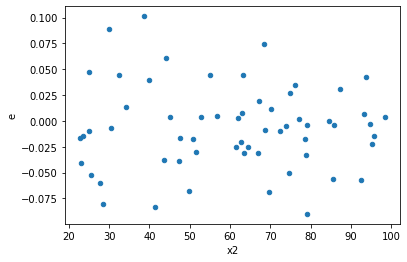

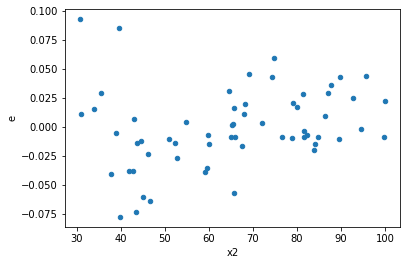

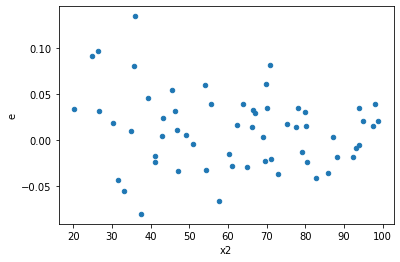

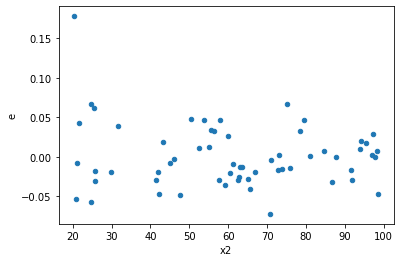

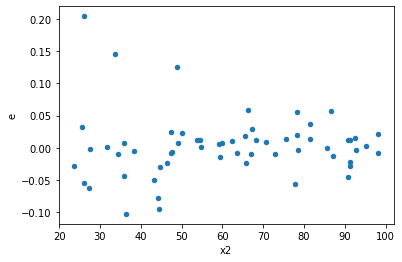

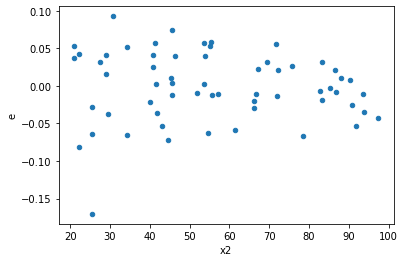

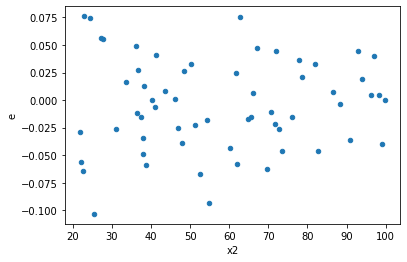

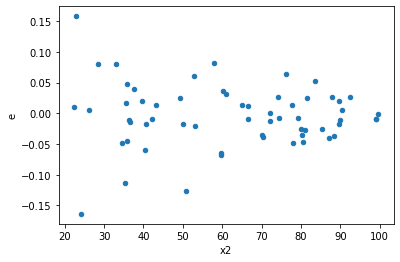

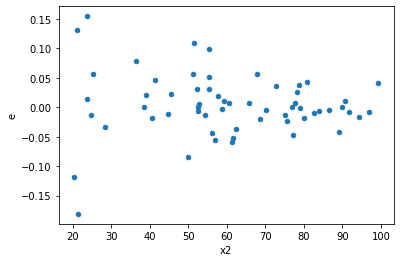

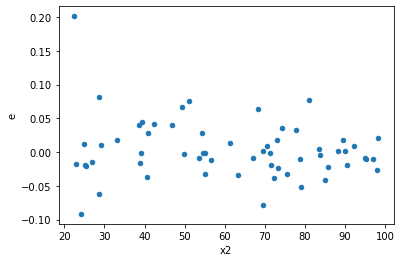

In [13]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
110.0,22.0,22.0,0.031995221615827386,0.034566335277997996,0.0014543282552648812,0.001571197058090818,1.0803593015557902,0.8577805339917204,0.5711097330041398,0.4288902669958602,Reject005=1 : Homoscedasticity
117.0,22.0,22.0,0.02587906230611074,0.04059918654279638,0.0011763210139141245,0.001845417570127108,1.5688043895319121,0.2984144241204665,0.8507927879397668,0.14920721206023324,Reject005=1 : Homoscedasticity
130.0,22.0,22.0,0.021555553456509852,0.031004367145086316,0.0009797978843868115,0.0014092894156857417,1.4383470694751699,0.4005916346669838,0.7997041826665081,0.2002958173334919,Reject005=1 : Homoscedasticity
146.0,22.0,22.0,0.03208464817404839,0.039255874789253645,0.0014583930988203812,0.0017843579449660747,1.2235095917618848,0.6402504292681714,0.6798747853659143,0.3201252146340857,Reject005=1 : Homoscedasticity
212.0,22.0,22.0,0.02399691537969663,0.03949784597437274,0.0010907688808953014,0.001795356635198761,1.6459551300410542,0.2502929596483481,0.874853520175826,0.12514647982417404,Reject005=1 : Homoscedasticity
243.0,22.0,22.0,0.028696486859311747,0.03570509969256117,0.001304385766332352,0.0016229590769345987,1.244232434012221,0.6127256666396024,0.6936371666801988,0.3063628333198012,Reject005=1 : Homoscedasticity
245.0,22.0,22.0,0.018206884908067957,0.02514437163854377,0.0008275856776394526,0.0011429259835701712,1.3810364466796636,0.4550850556366126,0.7724574721816937,0.2275425278183063,Reject005=1 : Homoscedasticity
264.0,22.0,22.0,0.023850367179446743,0.03607971049819634,0.0010841075990657611,0.0016399868408271063,1.5127528321362,0.33885238865623357,0.8305738056718832,0.16942619432811679,Reject005=1 : Homoscedasticity
280.0,22.0,22.0,0.021277446406699645,0.04575694230837491,0.0009671566548499839,0.0020798610140170416,2.1504903094935015,0.07931456404386905,0.9603427179780655,0.039657282021934526,Reject005=1 : Homoscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,22.0,22.0,0.03227970639618614,0.029042836718757122,0.0014672593816448245,0.0013201289417616874,0.8997243147846148,0.8064909908093644,Reject005=1 : Homoscedasticity
1.0,22.0,22.0,0.025206538326800722,0.01809144823731745,0.0011457517421273055,0.0008223385562417023,0.7177283926401671,0.4429007348941314,Reject005=1 : Homoscedasticity
2.0,22.0,22.0,0.06017678080444155,0.01490420130791389,0.0027353082183837066,0.0006774636958142678,0.24767362276072163,0.0018156316816204535,Reject005=0 : Heteroscedasticity
3.0,22.0,22.0,0.029282278727427665,0.017418284653159227,0.0013310126694285303,0.0007917402115072376,0.5948404772489287,0.23095877380935456,Reject005=1 : Homoscedasticity
4.0,22.0,22.0,0.06381850933448495,0.01836460002789928,0.0029008413333856797,0.0008347545467226945,0.28776291109601004,0.005059336874810201,Reject005=0 : Heteroscedasticity
5.0,22.0,22.0,0.06258917066708328,0.027932678775023582,0.0028449623030492397,0.0012696672170465265,0.4462861302892109,0.06481481449177041,Reject005=1 : Homoscedasticity
6.0,22.0,22.0,0.05714108916499955,0.02423956370217037,0.002597322234772707,0.0011017983500986532,0.4242054895414516,0.05005871590141106,Reject005=1 : Homoscedasticity
7.0,22.0,22.0,0.06794325362654037,0.01888877103897346,0.0030883297102972896,0.0008585805017715209,0.278008043930281,0.004023192554207674,Reject005=0 : Heteroscedasticity
8.0,22.0,22.0,0.11205881758813256,0.03048404077543886,0.005093582617642389,0.0013856382170654028,0.2720360738365245,0.00347565948945965,Reject005=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    610
Reject005=1 : Homoscedasticity      390
Name: Result_test, dtype: int64